# <p style="background-color:#36d6ec;font-family:serif;color:#FFFFFF;font-size:180%;text-align:center;border-radius:12px 12px;">Lead Scoring Project</p>

## 1. Problem Statement

Lead scoring is the process of assigning a "score" to each lead you generate for the business. The score is generated based on the interest shown by the lead in your business. The higher the score, the more likely the lead is to convert into a paying customer.

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.


Now, although X Education gets a lot of leads, its lead conversion rate is very poor, only about 30%. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## 1.1 Business Goals

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.<br>
We can assess lead probabilities by using the predict_proba() function.

## 2. Preparing the Work Environment

## 2.1 Importing Libraries

We will import all libraries here itself as to improve code readability.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from scipy.stats import linregress, uniform
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, roc_auc_score, precision_score, precision_recall_curve, PrecisionRecallDisplay, confusion_matrix


In [3]:
## suppress warnings
warnings.filterwarnings('ignore')

## 2.2 Loading and Understanding Data

In [4]:
df = pd.read_csv("C:/Users/shahd/Documents/UpgradEda/Lead Scoring Assignment/Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## checking the binary columns
binary_cats = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

null_values = df[binary_cats].isnull().sum()
total = df[binary_cats].count()
yes_no = df[binary_cats].applymap(lambda x: 1 if x == 'Yes' or x == 'No' else 0).sum()
df_binary_cats = pd.DataFrame({'total': total,
                               'null_%': null_values/total*100,
                               'yes/no_%': yes_no/total*100})
df_binary_cats

,total,null_%,yes/no_%
Do Not Email,9240,0.0,100.0
Do Not Call,9240,0.0,100.0
Search,9240,0.0,100.0
Magazine,9240,0.0,100.0
Newspaper Article,9240,0.0,100.0
X Education Forums,9240,0.0,100.0
Newspaper,9240,0.0,100.0
Digital Advertisement,9240,0.0,100.0
Through Recommendations,9240,0.0,100.0
Receive More Updates About Our Courses,9240,0.0,100.0


Fortunately, there are no missing values, so we can proceed with separating the data into train and test sets for better accuracy and model evaluation.

## 3. Data Preparation

We will separate the train and test datasets now to avoid data leaks and overfitting of the model.

We will also stratify the train and test dataset to ensure that we do not have any class imbalances in order to not have any skewed results.

In [8]:
train, test = train_test_split(df, test_size=.2, random_state=12, stratify=df['Converted'])
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (7392, 37)
test shape: (1848, 37)


In [9]:
# checking for duplicates
train[train.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates

In [10]:
train['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
NaN          3362
02.Medium    2243
01.High      1762
03.Low         25
Name: count, dtype: int64

In [11]:
train['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
NaN          3362
02.Medium    3080
01.High       648
03.Low        302
Name: count, dtype: int64

These asymmmetrique columns provide us with 3 major categories and some missing records. To improve data's quality for our ML models, we will focus on these three categories, focusing on the integers in reverse order, i.e 3>2>1.

## 3.1 Data Cleaning and feature engineering

In [12]:
## we will now clean the data
def data_cleaning(df):
    #dropping id columns
    df = df.drop(['Prospect ID','Lead Number'], axis=1)
    #asymmentrique index columns transformation
    df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].str.split('.', expand=True)[0]\
                                                                        .str.replace('0','').str.replace('1','4')\
                                                                        .str.replace('3','1').str.replace('4','3')\
                                                                        .astype(np.float64
                                                                               )
    df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].str.split('.', expand=True)[0]\
                                                                        .str.replace('0','').str.replace('1','4')\
                                                                        .str.replace('3','1').str.replace('4','3')\
                                                                        .astype(np.float64
                                                                               )
  # binary encoding for binary columns
    df[binary_cats] = df[binary_cats].applymap(lambda x: 1 if x == 'Yes' else 0)
    df.columns = df.columns.str.replace(' ','_').str.lower()
    return df
# Convert custom function into transformer
initial_clean = FunctionTransformer(data_cleaning)

train_clean = initial_clean.fit_transform(train);



## 4. Analysing Categorical columns

In [13]:
train_clean.lead_origin.value_counts(dropna=False)

lead_origin
Landing Page Submission    3906
API                        2889
Lead Add Form               550
Lead Import                  47
Name: count, dtype: int64

In [14]:
train_clean.lead_source.value_counts(dropna=False)

lead_source
Google               2326
Direct Traffic       2033
Olark Chat           1408
Organic Search        916
Reference             405
Welingak Website      111
Referral Sites         98
Facebook               46
NaN                    27
bing                    6
Click2call              4
google                  3
Live Chat               2
blog                    1
testone                 1
Social Media            1
youtubechannel          1
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
Name: count, dtype: int64

In [15]:
train_clean.last_activity.value_counts(dropna=False)

last_activity
Email Opened                    2712
SMS Sent                        2224
Olark Chat Conversation          793
Page Visited on Website          506
Converted to Lead                336
Email Bounced                    271
Email Link Clicked               211
Form Submitted on Website         97
NaN                               80
Unreachable                       71
Unsubscribed                      50
Had a Phone Conversation          23
Approached upfront                 8
View in browser link Clicked       5
Email Received                     2
Resubscribed to emails             1
Email Marked Spam                  1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [16]:
train_clean.country.value_counts(dropna=False)

country
India                   5201
NaN                     1954
United States             57
United Arab Emirates      49
Singapore                 21
Saudi Arabia              17
United Kingdom            13
Australia                  9
Qatar                      9
Bahrain                    6
Oman                       4
Nigeria                    4
Germany                    4
France                     4
unknown                    4
Kuwait                     3
Hong Kong                  3
Canada                     3
South Africa               3
China                      2
Belgium                    2
Sweden                     2
Italy                      2
Bangladesh                 2
Ghana                      2
Netherlands                2
Switzerland                1
Denmark                    1
Uganda                     1
Tanzania                   1
Russia                     1
Philippines                1
Malaysia                   1
Sri Lanka                  1
Asia/P

Insights <br>
<li>It's probable that NaN values originated from an "Other" source.</li>
            <li>We should rename "google" to "Google."</li>
            <li>Probably "Pay Per Click Ads" originated from "Google."</li>
            <li>We can group "Referral Sites" with "Blog" and "WeLearnBlog_Home."</li>
            <li>We can group "Live Chat" into the same category as "Olark Chat."</li>
            <li>Group "bing" with "Organic Search."</li>
            <li>Group "Click2call," "Social Media," "testone," "Press_release," "youtubechannel," "NC_EDM," and "WeLearn" into the "Other" category.</li>
            <li>Group "Email Received" with "SMS Sent."</li>
            <li>Group "Email Marked Spam" with "Email Bounced" and "Unsubscribed" in a new category called "Not interested in email."</li>
            <li>Group "Resubscribed to emails" with "Email Opened."</li>
            <li>Group "Visited Booth in Tradeshow" and "View in browser link Clicked" into "Page Visited on Website," as they express the same level of interest, although not the same activity.</li>
            <li>"Unknown" and "Asia/Pacific Region" could be classified as "NaN" as they don't add additional information.</li>
            <li>Possibly group regions into "Europe" and "Rest of Asia/Oceania."</li>

In [17]:
train_clean.specialization.value_counts(dropna=False)

specialization
Select                               1554
NaN                                  1154
Finance Management                    780
Marketing Management                  682
Human Resource Management             661
Operations Management                 407
Business Administration               329
IT Projects Management                295
Supply Chain Management               281
Banking, Investment And Insurance     272
Media and Advertising                 161
Travel and Tourism                    155
International Business                152
Healthcare Management                 128
Hospitality Management                 89
E-COMMERCE                             84
Retail Management                      76
Rural and Agribusiness                 59
E-Business                             43
Services Excellence                    30
Name: count, dtype: int64

More grouping can be done here too

In [18]:
train_clean.how_did_you_hear_about_x_education.value_counts(dropna=False)

how_did_you_hear_about_x_education
Select                   4023
NaN                      1768
Online Search             647
Word Of Mouth             288
Student of SomeSchool     258
Other                     139
Multiple Sources          128
Social Media               51
Advertisements             49
SMS                        21
Email                      20
Name: count, dtype: int64

In [19]:
train_clean.what_is_your_current_occupation.value_counts(dropna=False)

what_is_your_current_occupation
Unemployed              4474
NaN                     2159
Working Professional     559
Student                  172
Other                     14
Housewife                  8
Businessman                6
Name: count, dtype: int64

In [20]:
train_clean.what_matters_most_to_you_in_choosing_a_course.value_counts(dropna=False)

what_matters_most_to_you_in_choosing_a_course
Better Career Prospects      5216
NaN                          2173
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

It seems as if better career prospects and NaN are the only two categories that have a significant amount o data. However further analysis is needed to confirm this.

In [21]:
train_clean.tags.value_counts(dropna=False)

tags
NaN                                                  2687
Will revert after reading the email                  1664
Ringing                                               958
Interested in other courses                           418
Already a student                                     365
Closed by Horizzon                                    287
switched off                                          200
Busy                                                  146
Lost to EINS                                          138
Not doing further education                           110
Interested  in full time MBA                           92
Graduation in progress                                 87
invalid number                                         60
Diploma holder (Not Eligible)                          51
wrong number given                                     42
opp hangup                                             29
number not provided                                    21
in touch 

In [22]:
train_clean.lead_quality.value_counts(dropna=False)

lead_quality
NaN                  3796
Might be             1249
Not Sure              884
High in Relevance     508
Worst                 490
Low in Relevance      465
Name: count, dtype: int64

Missing values can be added to the not sure column, as it is the most neutral option.

The select value is prominent in many columns, and it is safe to assume that it is a missing value. we will consider it as not provided.

## Feature engineering

In [23]:
def initial_feature_engineering(df):
  # lead_source
  df['lead_source'] = df['lead_source'].str.replace('|'.join(['google','Pay per Click Ads']),'Google')
  df['lead_source'] = df['lead_source'].apply(lambda x: "Referral Sites" if 'blog' in str(x) else x)
  df['lead_source'] = df['lead_source'].str.replace('Live Chat','Olark Chat')
  df['lead_source'] = df['lead_source'].str.replace('bing','Organic Search')
  df['lead_source'] = df[df['lead_source'] != 'Other'].lead_source.apply(lambda x: "Other" if str(x) not in train_clean.lead_source.value_counts()[:8].index else x)
  # last_activity and last_notable_activity
  activity = ['last_activity','last_notable_activity']
  df[activity] = df[activity].apply(lambda x: x.str.replace('|'.join(['Email Received','SMS Sent']),'SMS/Email Sent'))
  df[activity] = df[activity].apply(lambda x: x.str.replace('|'.join(['Email Marked Spam','Email Bounced','Unsubscribed']),'Not interested in email'))
  df[activity] = df[activity].apply(lambda x: x.str.replace('Resubscribed to emails','Email Opened'))
  df[activity] = df[activity].apply(lambda x: x.str.replace('|'.join(['Visited Booth in Tradeshow','View in browser link Clicked']),'Page Visited on Website'))
  # country
  df['country'] = df['country'].apply(lambda x: np.nan if x in ['Unknown','unknown','Asia/Pacific Region'] else x)
  # specialization
  df['specialization'] = df['specialization'].str.replace('|'.join(['E-COMMERCE','E-Business']),'E-commerce')
  df['specialization'] = df['specialization'].str.replace('Banking, Investment And Insurance','Finance Management')
  df['specialization'] = df['specialization'].str.replace('Media and Advertising','Marketing Management')
  df['specialization'] = df['specialization'].str.replace('Select','Not Provided')
  # how_did_you_hear
  df['how_did_you_hear_about_x_education'] = df['how_did_you_hear_about_x_education'].str.replace('Select','Not Provided')
  df['how_did_you_hear_about_x_education'] = df['how_did_you_hear_about_x_education'].str.replace('|'.join(['SMS','Email']),'SMS/Email')
  # importance_in_course
  df['what_matters_most_to_you_in_choosing_a_course'] = df['what_matters_most_to_you_in_choosing_a_course'].str.replace('|'.join(['Flexibility & Convenience','Other']),"Better Career Prospects")
  # lead_profile
  df['lead_profile'] = df['lead_profile'].str.replace('Select','Not Assigned')
  # city
  df['city'] = df['city'].str.replace('Select','Not Provided')

  return df

initial_feature_engineering = FunctionTransformer(initial_feature_engineering)
train_clean = initial_feature_engineering.fit_transform(train_clean)

### What did we do :-
Grouped the categories as per our insights and created a new column for each of them.
last activity and last notable activity were similar, so we joined them together. and grouped columns <br>
Now the dataset is much more cleaner and ready for model building.

## 4.1 Dealing with missing values

In [24]:
## we will copy the dataset for further analysis and set a style in seaborn for the plots
train_ = train_clean.copy()
train_eda = train.copy()
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('magma')

In [25]:
null_ = pd.DataFrame()
null_['proportion'] = np.round(train_clean.isnull().sum()/len(train_clean),4) * 100
null_['amount'] = train_clean.isnull().sum()

# Show only those columns with at least 1 missing value
null_.sort_values(by='proportion', ascending=False)[null_.amount > 0]

,proportion,amount
lead_quality,51.35,3796
asymmetrique_activity_index,45.48,3362
asymmetrique_profile_score,45.48,3362
asymmetrique_profile_index,45.48,3362
asymmetrique_activity_score,45.48,3362
tags,36.35,2687
lead_profile,29.40,2173
what_matters_most_to_you_in_choosing_a_course,29.40,2173
what_is_your_current_occupation,29.21,2159
country,26.50,1959


In [26]:
# defining plot functions
def barplot_catcols(column,width,heigh):
  """Plot conversion rate"""
  fig, ax  = plt.subplots(figsize=(width,heigh))
  ax = sns.barplot(data=train_.fillna('NaN'), x='converted', y=column,
            order=order(train_.fillna('NaN'),column),
            orient='h', palette='magma',
            seed=2)
  plt.title(f'Conversion Rate by {column.replace("_"," ").title()}', loc='left', size=18)
  return ax

def order(df,x,y=None):
    if y is not None:
        return df.groupby(x)[y].mean().sort_values(ascending=False).index
    else:
        return df.groupby(x)['converted'].mean().sort_values(ascending=False).index

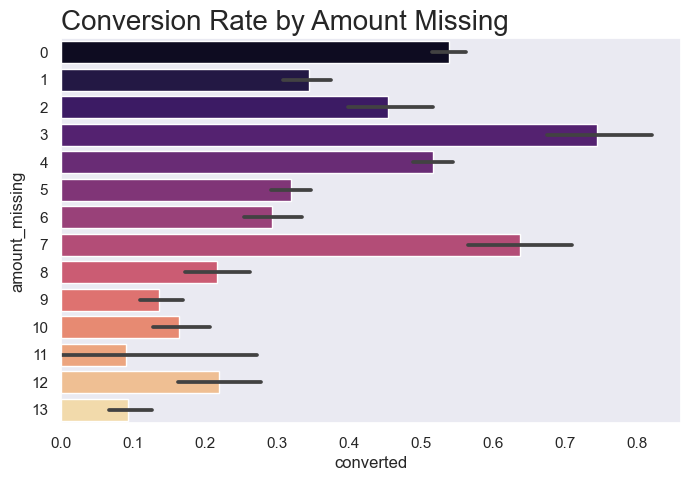

In [27]:
# calculating the impact of missing values on conversion
# Number of missing values in each row
train_['amount_missing'] = train_.isnull().sum(1)

# Plot the relation between amount missing and conversion rate
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=train_.fillna('NaN'), x='converted', y='amount_missing',
            orient='h', palette='magma',
            seed=2)
plt.title(f'Conversion Rate by Amount Missing', loc='left', size=20)
plt.show()

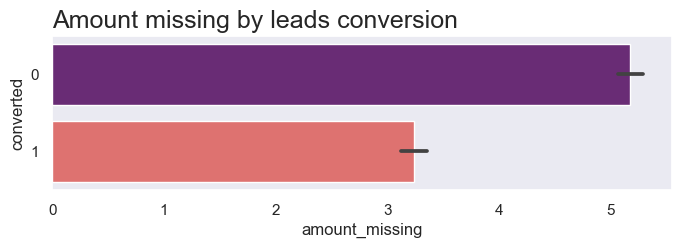

In [28]:
fig, ax  = plt.subplots(figsize=(8,2))
ax = sns.barplot(data=train_, x='amount_missing', y='converted',
            orient='h', palette=sns.color_palette('magma',2),
            seed=2)
plt.title(f'Amount missing by leads conversion', loc='left', size=18)
plt.show()

## 4.2 correlation of numerical columns with converted columns


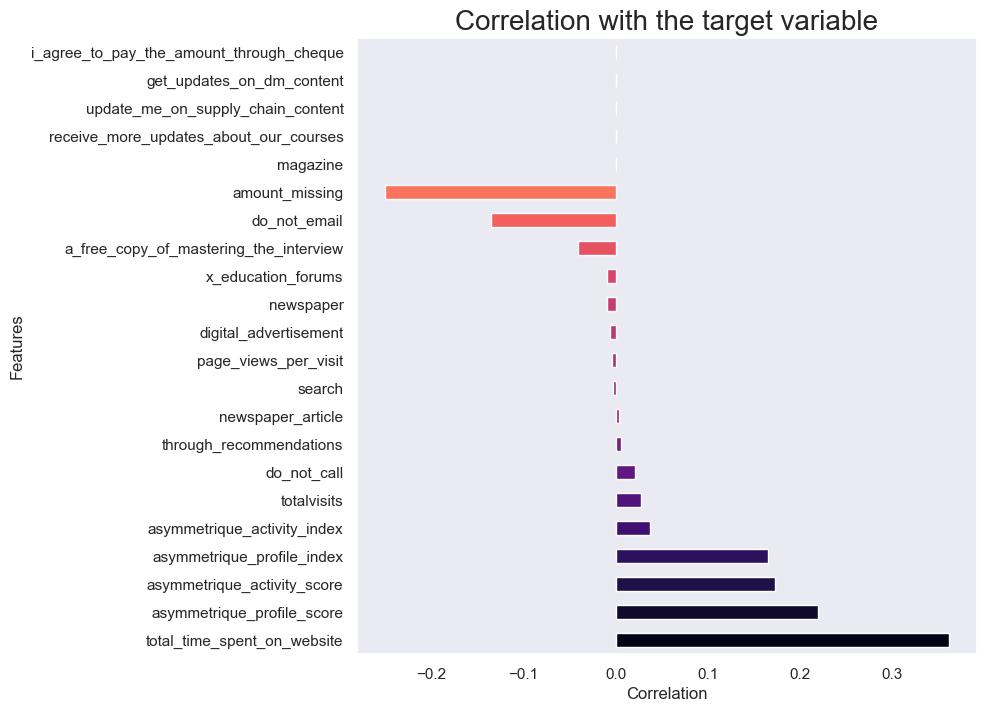

In [29]:
correlations = train_.select_dtypes('number').corr()['converted'].sort_values(ascending=False)

plt.figure(figsize=(8, 8))
correlations[1:].plot(kind='barh', 
                 color=sns.color_palette('magma', len(correlations)))

plt.title('Correlation with the target variable', fontsize=20)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

 Insights <br>
 <li>There's a negative correlation between missing lead data and the conversion rate. Higher instances of missing data might signify incomplete or poorly managed lead information, leading to potential difficulties in accurately categorizing and nurturing leads.</li>
            <li>"Total Time Spent On Website," has a stronger correlation with the target variable than the number of missing values columns. This suggests that it might be a better potential predictor than most of the other features.</li>

## 5. Exploratory Data Analysis

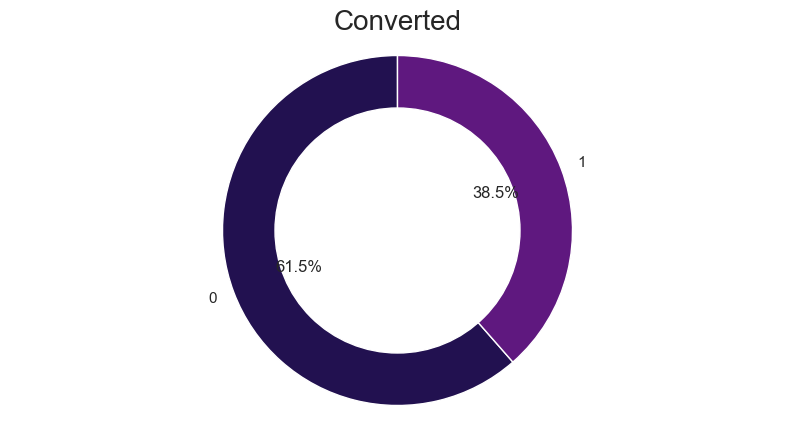

In [30]:
count = train_['converted'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Converted', size=20)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

In [31]:
# checking for redundant information across columns
train_.loc[:,'asymmetrique_activity_index':'asymmetrique_profile_score'].corr().style.background_gradient(cmap='vlag_r')

,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score
asymmetrique_activity_index,1.000000,-0.145399,0.855985,-0.122669
asymmetrique_profile_index,-0.145399,1.000000,-0.145366,0.883177
asymmetrique_activity_score,0.855985,-0.145366,1.000000,-0.114636
asymmetrique_profile_score,-0.122669,0.883177,-0.114636,1.000000


There is a strong relation between the index and score columns, wrt the data, we shall drop the index columns in favour of the score column.

### 5.1.1 profile scoring and classifier


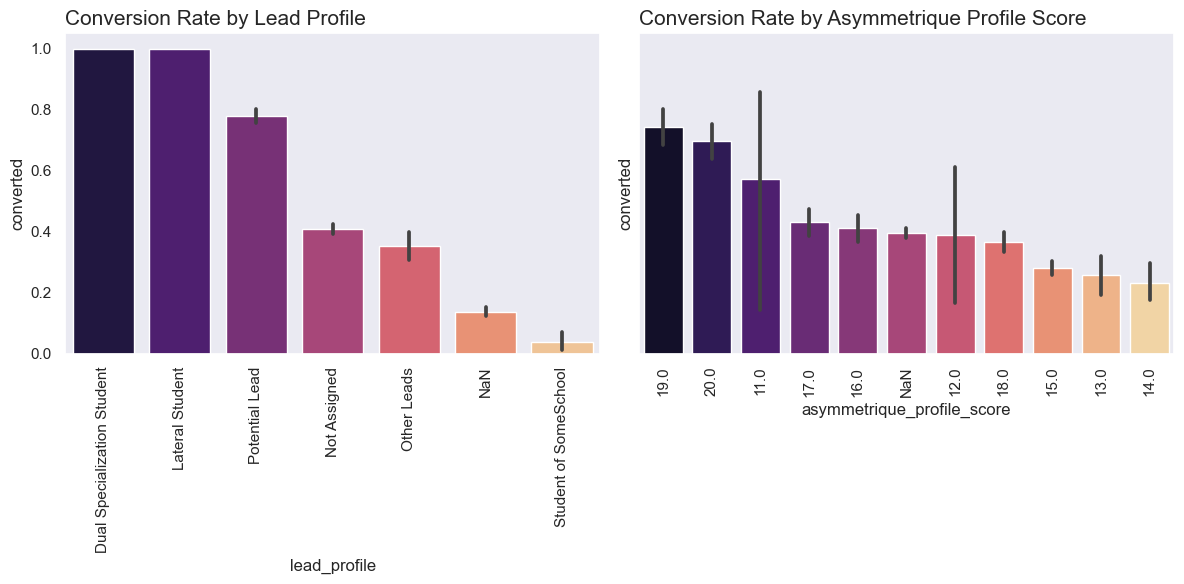

In [32]:
fig, ax  = plt.subplots(1,2, figsize=(12,6), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='lead_profile', y='converted',
            palette='magma', order=order(train_.fillna('NaN'),'lead_profile'),
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Lead Profile', loc='left', size=15)

sns.barplot(data=train_.fillna('NaN'), x='asymmetrique_profile_score', y='converted',
                  palette='magma', order=order(train_.fillna('NaN'),'asymmetrique_profile_score'),
                    seed=2, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by Asymmetrique Profile Score', loc='left', size=15)

plt.tight_layout()
plt.show()

Insights <br>
There is a big difference between not assigned and NaN values, so we will keep them as separate categories. <br>
Profile score is a good predictor of conversion rate, as the higher the score, the higher the conversion rate. <br>
we can drop lead profile in favour of profile score as it is a better predictor.

## 5.1.2 Lead Activity

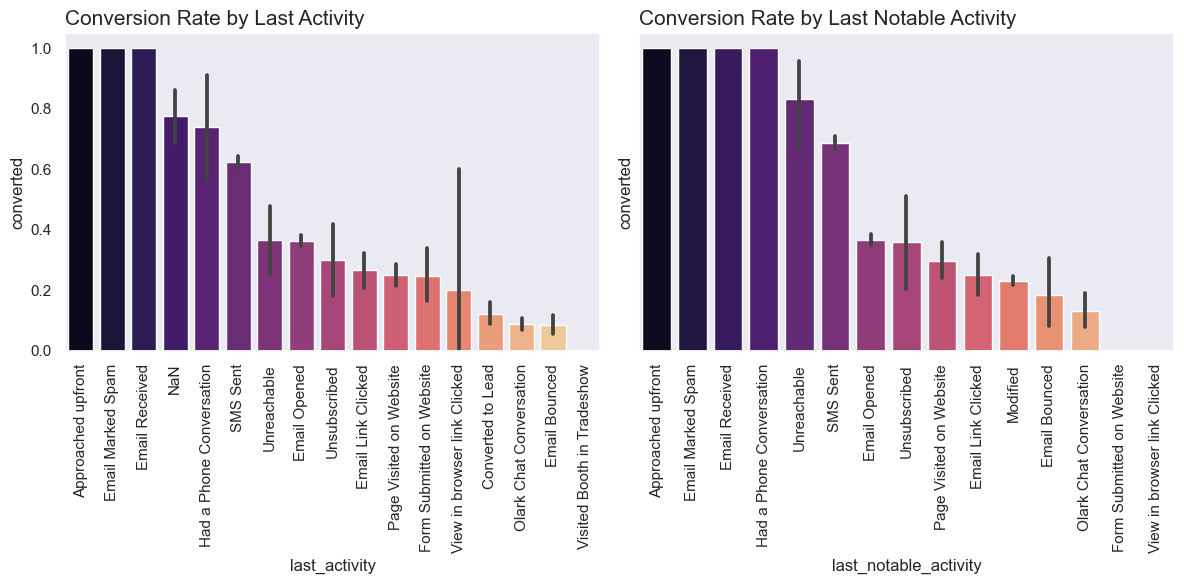

In [33]:
fig, ax  = plt.subplots(1,2, figsize=(12,6), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='last_activity', y='converted',
            order=order(train_.fillna('NaN'),'last_activity'),
            palette='magma',
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Last Activity', loc='left', size=15)

sns.barplot(data=train_.fillna('NaN'), x='last_notable_activity', y='converted',
                  order=order(train_.fillna('NaN'),'last_notable_activity'),
                  palette='magma', seed=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by Last Notable Activity', loc='left', size=15)

plt.tight_layout()
plt.show()

In [34]:
activity_columns = ['totalvisits','total_time_spent_on_website','page_views_per_visit',
                    'asymmetrique_profile_score','asymmetrique_activity_score']

train_[activity_columns].corr().style.background_gradient(cmap='vlag_r')

,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_profile_score,asymmetrique_activity_score
totalvisits,1.000000,0.261952,0.598883,0.129016,-0.061397
total_time_spent_on_website,0.261952,1.000000,0.323684,0.167992,-0.066008
page_views_per_visit,0.598883,0.323684,1.000000,0.165945,-0.171264
asymmetrique_profile_score,0.129016,0.167992,0.165945,1.000000,-0.114636
asymmetrique_activity_score,-0.061397,-0.066008,-0.171264,-0.114636,1.000000


Last notable activity seems to be a better predictor of the conversion rate, so we will keep it.

### 5.1.3 Lead Quality + Tags

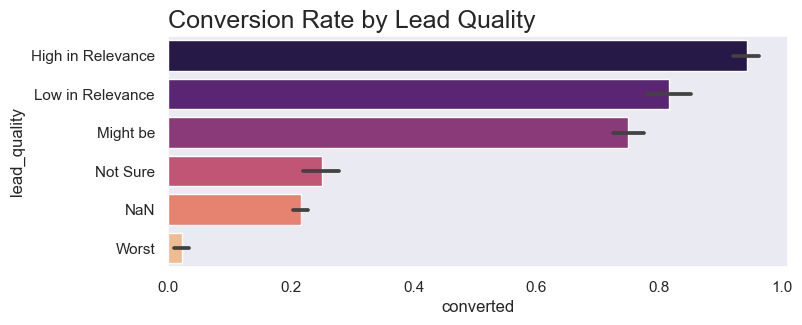

In [35]:
barplot_catcols('lead_quality',8,3)
plt.show()

Null values and not sure values are almost similar, indicating that it might be an input inconsistency.

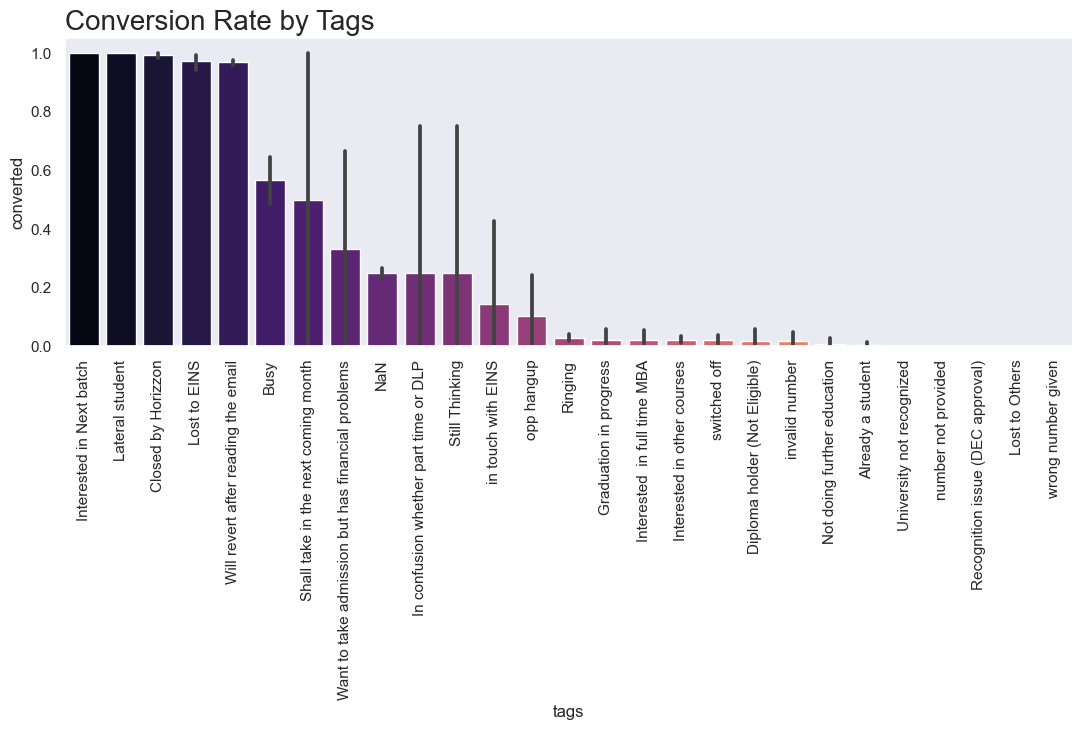

In [36]:
fig, ax  = plt.subplots(figsize=(13,4))

sns.barplot(data=train_.fillna('NaN'), x='tags', y='converted',
            order=order(train_.fillna('NaN'),'tags'),
            palette='magma',
            seed=2)
plt.xticks(rotation=90)
plt.title(f'Conversion Rate by Tags', loc='left', size=20)
plt.show()

Insights <br>
<li>Group "Invalid Number," "Wrong Number Given," and "Number Not Provided" into a category called "Not Interested in Calls."</li>
<li>Group "Want to Take Admission But Has Financial Problems," "Recognition Issue (DEC Approval)," "Graduation in Progress" as a new category called "Not Eligible for the Moment."</li>
            <li>Group "In Confusion Whether Part-Time or DLP," "Interested in Next Batch," "Shall Take in the Next Month," and "Still Thinking" into a category called "Shows Certain Interest."</li><li>Group "Ringing" and "Switched Off" in a new category called "Still No Contact."</li>
            <li>Group "University Not Recognized" and "Diploma Holder (Not Eligible)" into a new category called "Not Eligible."</li>
            <li>Group "Interested in Other Courses," "Interested in Full-Time MBA," and "Not Doing Further Education" as "Doesn't Show Interest."</li>
            <li>"Lateral Student," "Lost to Others," and the rest of the minor categories might be grouped as "Others."</li>

### 5.1.4 Specialization + Occupation

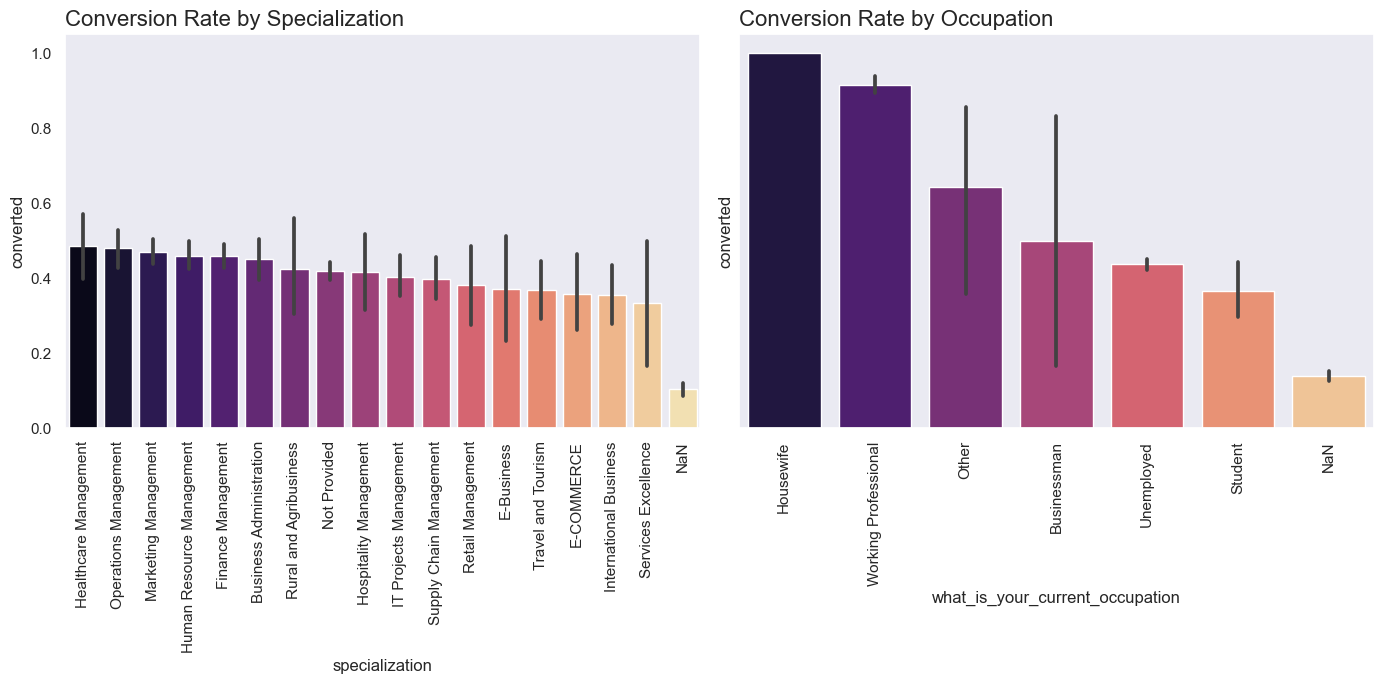

In [37]:
fig, ax  = plt.subplots(1,2, figsize=(14,7), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='specialization', y='converted',
            order=order(train_.fillna('NaN'),'specialization'),
            palette='magma',
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Specialization', loc='left', size=16)

sns.barplot(data=train_.fillna('NaN'), x='what_is_your_current_occupation', y='converted',
                  order=order(train_.fillna('NaN'),'what_is_your_current_occupation'),
                  palette='magma', seed=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by Occupation', loc='left', size=16)

plt.tight_layout()
plt.show()

In [38]:
train_[['what_is_your_current_occupation','specialization']].isnull().sum(1).value_counts()

0    5220
2    1141
1    1031
Name: count, dtype: int64

grouping people by current occupation seems to be a better predictor of conversion rate.

### 5.1.5 Location based data

In [43]:
conversion_country = train_.groupby('country')['converted'].mean()
country_count = train_['country'].value_counts().sort_index()

fig = go.Figure(data=go.Choropleth(
    locations=conversion_country.index,
    locationmode='country names',
    z=conversion_country.values,
    text=country_count.values,
    colorscale='deep', 
    colorbar_title='Conversion Rate',
    hovertemplate='%{location}<br>Conversion: %{z:.2f}<br>Count: %{text}',
))

fig.update_geos(projection_type="mercator")

fig.update_layout(
    title='Conversion Rate by Country',
    geo=dict(showcoastlines=True),
    font=dict(size=16),
)

fig.show()

In [44]:
train_['country'].value_counts().sort_index()

country
Australia                  9
Bahrain                    6
Bangladesh                 2
Belgium                    2
Canada                     3
China                      2
Denmark                    1
France                     4
Germany                    4
Ghana                      2
Hong Kong                  3
India                   5201
Italy                      2
Kenya                      1
Kuwait                     3
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       4
Philippines                1
Qatar                      9
Russia                     1
Saudi Arabia              17
Singapore                 21
South Africa               3
Sri Lanka                  1
Sweden                     2
Switzerland                1
Tanzania                   1
Uganda                     1
United Arab Emirates      49
United Kingdom            13
United States             57
Name: count, dtype: int64

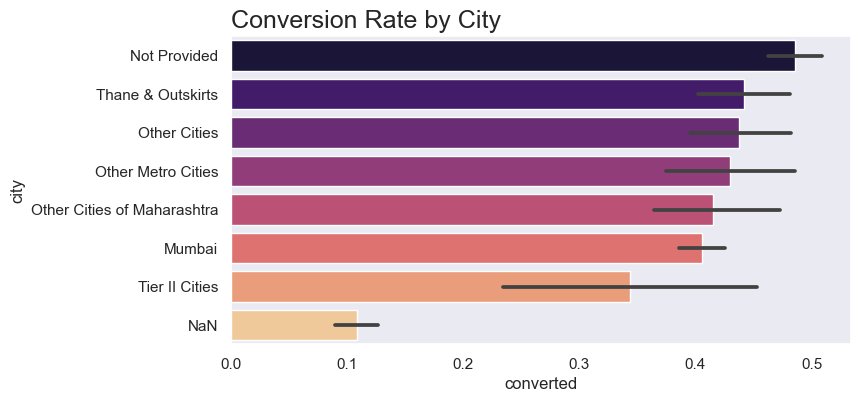

In [45]:
barplot_catcols('city',8,4)
plt.show()

In [46]:
print("Cities where country isn't India:")
train_[train_['country'] != 'India'].city.value_counts(dropna=False)

Cities where country isn't India:


city
Not Provided                   992
NaN                            693
Mumbai                         244
Other Cities                    98
Thane & Outskirts               83
Other Cities of Maharashtra     49
Other Metro Cities              27
Tier II Cities                   5
Name: count, dtype: int64

In [47]:
print('Countries where City es equal to an Indian city:')
indian_cities = ['Mumbai','Thane & Outskirts','Other Cities of Maharashtra','Tier II Cities']
train_[train_.city.isin(indian_cities)].country.value_counts(dropna=False)

Countries where City es equal to an Indian city:


country
India                   3220
NaN                      270
United States             32
United Arab Emirates      19
Singapore                 11
United Kingdom             9
Saudi Arabia               8
Australia                  6
Qatar                      5
Bahrain                    4
Germany                    3
Belgium                    2
Canada                     2
Netherlands                2
Kuwait                     1
France                     1
Sweden                     1
Malaysia                   1
Hong Kong                  1
Switzerland                1
Oman                       1
China                      1
Name: count, dtype: int64

**The data provided here is wrong**

We will mnipulate the data and group Indian Cities as follows :-
the top 5 most frequent inputs will remain same, and others will be grouped as others.
also, on a sidenote people without any information in the cities column have a significantly lower conversion rate

### 5.1.6 Lead Sources

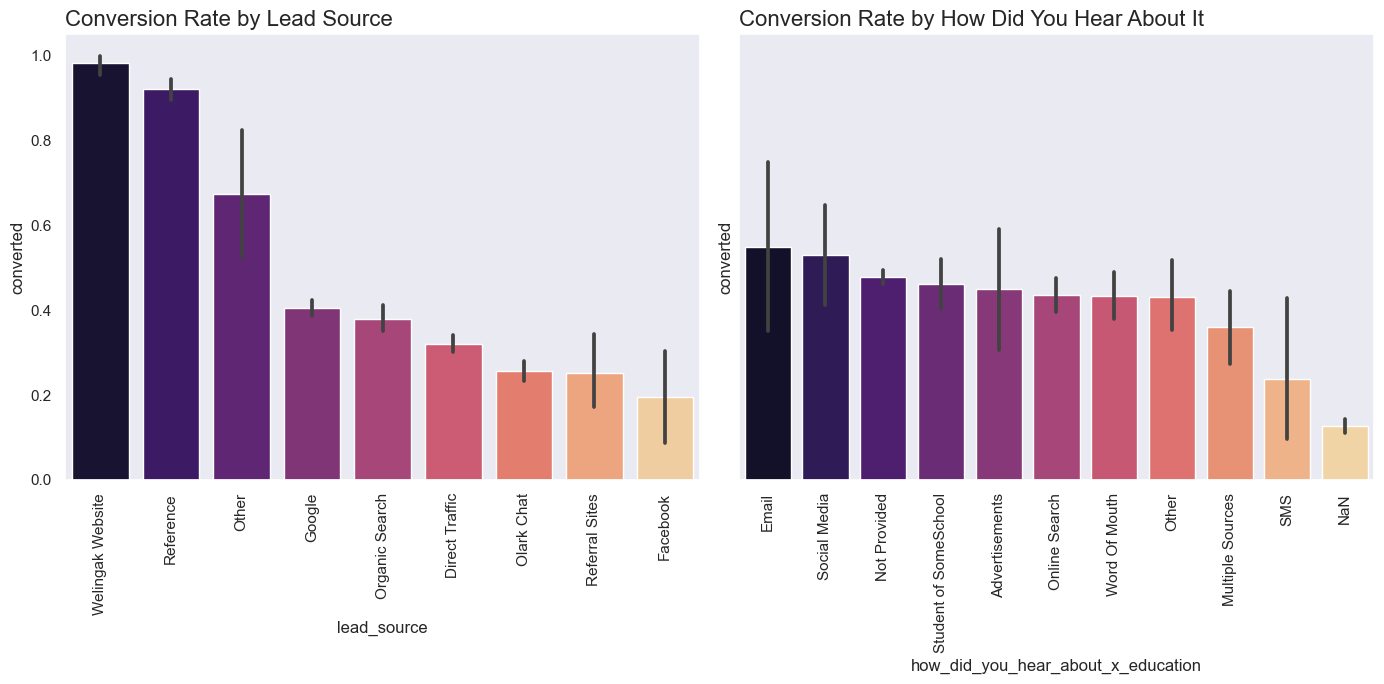

In [48]:
fig, ax  = plt.subplots(1,2, figsize=(14,7), sharey=True)

sns.barplot(data=train_.fillna('NaN'), x='lead_source', y='converted',
            order=order(train_.fillna('NaN'),'lead_source'),
            palette='magma',
            seed=2, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title(f'Conversion Rate by Lead Source', loc='left', size=16)

sns.barplot(data=train_.fillna('NaN'), x='how_did_you_hear_about_x_education', y='converted',
                  order=order(train_.fillna('NaN'),'how_did_you_hear_about_x_education'),
                  palette='magma', seed=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title(f'Conversion Rate by How Did You Hear About It', loc='left', size=16)

plt.tight_layout()
plt.show()

Lead source is a good predictor of conversion rate, so we will keep it.

## 5.2 Numerical Data

In [49]:
train_.select_dtypes(include=['number']).nunique().sort_values()

i_agree_to_pay_the_amount_through_cheque       1
get_updates_on_dm_content                      1
update_me_on_supply_chain_content              1
receive_more_updates_about_our_courses         1
magazine                                       1
do_not_email                                   2
through_recommendations                        2
a_free_copy_of_mastering_the_interview         2
newspaper                                      2
digital_advertisement                          2
newspaper_article                              2
search                                         2
converted                                      2
do_not_call                                    2
x_education_forums                             2
asymmetrique_activity_index                    3
asymmetrique_profile_index                     3
asymmetrique_profile_score                    10
asymmetrique_activity_score                   11
amount_missing                                14
totalvisits         

Almost all numerical columns have a binary output, and even amongst them, most of the data is 0, so we will not consider them for analysis as to declutter the dataset and not have any negative impact on the model.

### 5.2.1 Total Visits

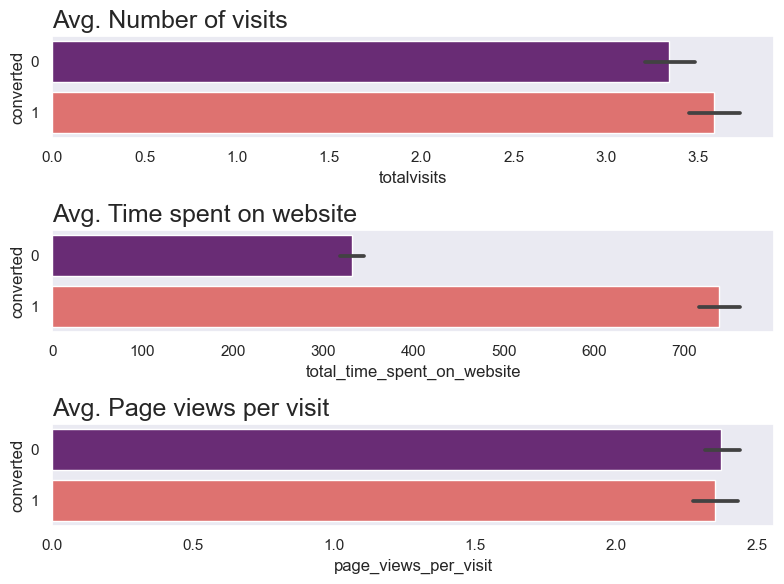

In [50]:
fig, ax  = plt.subplots(3, figsize=(8,6))
sns.barplot(data=train_, x='totalvisits', y='converted',
            orient='h', palette='magma',
            seed=2, ax=ax[0])
ax[0].set_title(f'Avg. Number of visits', loc='left', size=18)

sns.barplot(data=train_, x='total_time_spent_on_website', y='converted',
            orient='h', palette='magma',
            seed=2, ax=ax[1])
ax[1].set_title(f'Avg. Time spent on website', loc='left', size=18)

sns.barplot(data=train_, x='page_views_per_visit', y='converted',
            orient='h', palette='magma',
            seed=2, ax=ax[2])
ax[2].set_title(f'Avg. Page views per visit', loc='left', size=18)

plt.tight_layout()
plt.show()

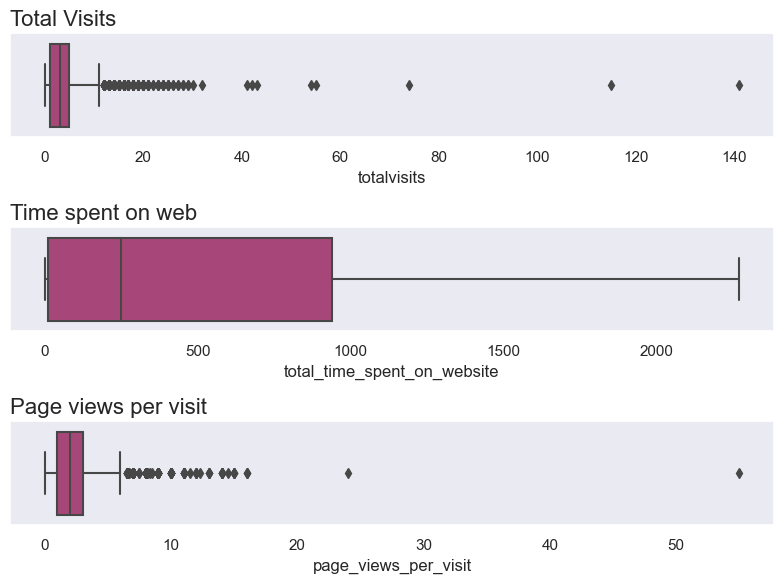

In [51]:
fig, ax = plt.subplots(3,1, figsize=(8,6))
sns.boxplot(data=train_, x='totalvisits',
              ax=ax[0], palette='magma')
ax[0].set_title('Total Visits', loc='left', size=16)

sns.boxplot(data=train_, x='total_time_spent_on_website',
              ax=ax[1], palette='magma')
ax[1].set_title('Time spent on web', loc='left', size=16)

sns.boxplot(data=train_, x='page_views_per_visit',
              ax=ax[2], palette='magma')
ax[2].set_title('Page views per visit', loc='left', size=16)

plt.tight_layout()
plt.show()

The analysis proves our hypothesis that more time on the website means a better conversion rate.

## 6. Data Wrangling

Adressing outliers is extremely important for model accuracy, particularly in logistic regression. so we will cap the outliers to 95th percentile. <br>
Handling missing values :- <br>
Numerical columns - we will use KNN imputation via KNN imputer <br>
Categorical columns - we will treat missing values as separate categories, as imputing it with mode will skew the data.

## Apply all the insights from EDA

In [52]:
def eda_feature_engineering(df):
  # tags column
  df['tags'] = df['tags'].str.replace('|'.join(['invalid number','wrong number given','number not provided']),'Not interest in calls')
  df['tags'] = df['tags'].str.replace('|'.join(["In confusion whether part time or DLP", "Interested in Next batch", "Shall take in the next coming month", "Still Thinking"]), "Shows certain interest")
  df['tags'] = df['tags'].str.replace("University not recognized","Not elegible")
  df['tags'] = df[df['tags'].notnull()].tags.apply(lambda x: 'Not elegible' if 'holder' in x else x)
  df['tags'] = df['tags'].str.replace('|'.join(["Interested in other courses", "Interested  in full time MBA", "Not doing further education"]),"Doesn't show interest")
  df['tags'] = df['tags'].str.replace('|'.join(["Ringing","switched off"]),"Still no contact")
  df['tags'] = df['tags'].str.replace('|'.join(["Want to take admission but has financial problems", "Graduation in progress"]),"Not elegible for the moment")
  df['tags'] = df[df['tags'].notnull()].tags.apply(lambda x: 'Not elegible for the moment' if 'Recognition' in x else x)
  df['tags'] = df[df['tags'].notnull()].tags.apply(lambda x: 'Other' if x not in df.tags.value_counts(dropna=False)[:12] else x)

  # country and city
  indian_cities = ['Mumbai','Thane & Outskirts','Other Cities of Maharashtra','Tier II Cities']
  df.loc[(df.country != 'India') & (df.city.isin(indian_cities)),'country'] = 'India'
  df['country'] = df.loc[df['country'].notnull(),'country'].apply(lambda x: 'Other' if x not in df.loc[df['country'] != 'Other','country'].value_counts()[:4] else x)

  # lead quality
  df['lead_quality'] = df['lead_quality'].fillna('Not Sure')

  # convert asymmetrique index columns in strings columns
  df[['asymmetrique_profile_index','asymmetrique_activity_index']] = df[['asymmetrique_profile_index','asymmetrique_activity_index']].astype(str)

  # drop columns with unique values
  drop_cols = ['magazine','receive_more_updates_about_our_courses','update_me_on_supply_chain_content',
               'get_updates_on_dm_content','i_agree_to_pay_the_amount_through_cheque']
  df = df.drop(drop_cols, axis=1)

  #add amount_missing column
  df['amount_missing'] = df.isnull().sum(1)
  return df

eda_feature_engineering = FunctionTransformer(eda_feature_engineering)

### 7.2 Handling Outliers

In [56]:
def cap_outliers(df):
  """Replace outliers with the 95th percentile"""
  num_cols = ['totalvisits','page_views_per_visit','total_time_spent_on_website']
  df[num_cols[0]].apply(lambda x: df[num_cols[0]].quantile(.95) if x > df[num_cols[0]].quantile(.95) else x)
  df[num_cols[1]].apply(lambda x: df[num_cols[1]].quantile(.95) if x > df[num_cols[1]].quantile(.95) else x)
  df[num_cols[2]].apply(lambda x: df[num_cols[2]].quantile(.95) if x > df[num_cols[2]].quantile(.95) else x)
  return df

cap_outliers = FunctionTransformer(cap_outliers)

### 7.3 Handling Missing Values

In [57]:
## we will apply onehotencoder to the categorical columns and standard scaler to the numerical columns
cat_columns = ['lead_origin','lead_source','country','what_is_your_current_occupation',
                'what_matters_most_to_you_in_choosing_a_course','tags','lead_quality',
                'city','last_notable_activity']

num_cols = ['totalvisits','page_views_per_visit','total_time_spent_on_website',
            'asymmetrique_activity_score','asymmetrique_profile_score','amount_missing']

impute_knn = KNNImputer(n_neighbors=5)
impute_cons = SimpleImputer(strategy='constant', fill_value='Missing')
ohe = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

# Make pipelines for both type of columns treatments
pipe_cat = make_pipeline(impute_cons,ohe)
pipe_num = make_pipeline(sc,impute_knn)

impute_scale = make_column_transformer(
                                        (pipe_cat, cat_columns),
                                        (pipe_num,num_cols),
                                        remainder='drop'
                                            )

### 7.4 Seperating X and Y

In [58]:
X_train = train.drop('Converted',axis=1)
y_train = train.loc[:,'Converted']

### 7.5 Implementing A Pipeline

Implementing a pipeline will help us to scale the data and apply the same transformations to new datasets too.
implementing a pipeline is essential when working with ML as it provides many benefits and also ensures that the data is not leaked.

In [59]:
pipe = make_pipeline(
                    initial_clean,
                    initial_feature_engineering,
                    eda_feature_engineering,
                    cap_outliers,
                    impute_scale
              )
pipe

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function data_cleaning at 0x00000284F01B2C00>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function initial_feature_engineering at 0x00000284F01B2E80>)),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function eda_feature_engineering at 0x00000284F57E6AC0>)),
                ('functiontransformer-...
                                                   'what_is_your_current_occupation',
                                                   'what_matters_most_to_you_in_choosing_a_course',
                                                   'tags', 'lead_quality',
                                                   'city',
                                                   'last_notable_activity']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer())]),
                                                  ['totalvisits',
                                                   'page_views_per_visit',
                                                   'total_time_spent_on_website',
                                                   'asymmetrique_activity_score',
                                                   'asymmetrique_profile_score',
                                                   'amount_missing'])]))])

In [60]:
X_train_pp = pipe.fit_transform(X_train)

**The pipeline works as intended and can be used to scale and upgrade this model in the future**

## 8. Model Building

Keeping in mind our requirements, we will now choose a few different models and compare their results to find the best one.

### Display function and stratified K fold

In [62]:
# we shall use stratified fold for ensure that we shuffle the dataset and conserve classes
skfold = StratifiedKFold(5, shuffle=True, random_state=12)

def display_scores(model,scores,pred):
  print(f'----------- {model} -----------')
  print('')
  print("------------------ Cross validation scores:")
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
  print('')
  print("--------------- Scores in the training set:")
  print("Precision:", precision_score(y_train,pred))
  print("Recall:", recall_score(y_train,pred))
  print("F1 score:", f1_score(y_train,pred))
  print("ROC - AUC score:", roc_auc_score(y_train,pred))

### 8.1 Logistic Regression

In [63]:
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train_pp, y_train,
                            cv=skfold, scoring='f1')
lr.fit(X_train_pp,y_train)
lr_pred = lr.predict(X_train_pp)

# Precision and recall curve
lr_prec, lr_recall, lr_threshold = precision_recall_curve(y_train, lr_pred, pos_label=lr.classes_[1])
lr_prdisplay = PrecisionRecallDisplay(precision=lr_prec, recall=lr_recall)

# Display Scores
display_scores('Logistic Regression',lr_scores,lr_pred)

----------- Logistic Regression -----------

------------------ Cross validation scores:
Scores: [0.91741472 0.91592129 0.91785714 0.91896705 0.93191866]
Mean: 0.920415772237881
Standard deviation: 0.005833839247863671

--------------- Scores in the training set:
Precision: 0.9382491827097712
Recall: 0.9066339066339066
F1 score: 0.9221706533380934
ROC - AUC score: 0.9346068498610871


### 8.2 Random Forest Classifier

In [64]:
rf = RandomForestClassifier(random_state=10,
                            oob_score=True)
rf_scores = cross_val_score(rf, X_train_pp, y_train,
                            cv=skfold, scoring='f1')
rf.fit(X_train_pp, y_train)
rf_pred = rf.predict(X_train_pp)
rf_pred_proba = rf.predict_proba(X_train_pp)

# Precision and recall curve
rf_prec, rf_recall, rf_threshold = precision_recall_curve(y_train, rf_pred_proba[:,1], pos_label=rf.classes_[1])
rf_prdisplay = PrecisionRecallDisplay(precision=rf_prec, recall=rf_recall)

# Display scores
display_scores('Random Forest',rf_scores,rf_pred)
print('Oob score: ',rf.oob_score_)

----------- Random Forest -----------

------------------ Cross validation scores:
Scores: [0.91921005 0.91974752 0.93027361 0.9215859  0.93960924]
Mean: 0.9260852646703863
Standard deviation: 0.00785009330810528

--------------- Scores in the training set:
Precision: 0.9908995449772489
Recall: 0.9936819936819937
F1 score: 0.9922888187872415
ROC - AUC score: 0.9939794516065702
Oob score:  0.9422348484848485


### 8.3 Decision Tree Classifier

In [65]:
tree = DecisionTreeClassifier(random_state = 7)
tree_scores = cross_val_score(tree, X_train_pp, y_train,
                              cv=skfold, scoring='f1')
tree.fit(X_train_pp, y_train)
tree_pred = tree.predict(X_train_pp)

# Precision and recall curve
tree_prec, tree_recall, tree_threshold = precision_recall_curve(y_train, tree_pred, pos_label=tree.classes_[1])
tree_prdisplay = PrecisionRecallDisplay(precision=tree_prec, recall=tree_recall)

# Display scores
display_scores('Decission Tree',tree_scores,tree_pred)

----------- Decission Tree -----------

------------------ Cross validation scores:
Scores: [0.89492119 0.89612676 0.89806678 0.89137931 0.89837746]
Mean: 0.8957743001598371
Standard deviation: 0.0025377098574763494

--------------- Scores in the training set:
Precision: 0.9912434325744308
Recall: 0.9933309933309933
F1 score: 0.9922861150070126
ROC - AUC score: 0.9939140108631633


## 9. Model Evaluation

As we can see, the Random Forest Classifier has the highest average scores, (0.926) indicating that it is the most accurate model. <br>
logistic regression is the second best model, with an average score of 0.919.<br>
In the case of Decision Tree classifier, it has the lowest mean cross validation score of 0.(0.895), indicating that it is not performing good on unseen data, suggesting that it is overfitting.

> For the purposes of this project, we will choose the Logistic Regression model.

## 10. Making Predictions

> We will now take the test dataset and put it through the pipeline to make predictions.

In [66]:
X_test = test.drop('Converted',axis=1)
y_test = test.loc[:,'Converted']

# we will look at the first row for now
X_test.to_numpy()[:1]

array([['b4d86fa1-53d9-4a27-8d0c-f6603a562184', 634844, 'API', 'Google',
        'No', 'No', 2.0, 1551, 1.0, 'SMS Sent', 'India', nan, nan, nan,
        nan, 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', nan, nan,
        'No', 'No', nan, nan, '02.Medium', '02.Medium', 15.0, 15.0, 'No',
        'No', 'SMS Sent']], dtype=object)

In [67]:
# apply all the preprocessing steps to the test dataset
X_test_pp = pipe.transform(X_test)
X_test_pp.toarray()[:1]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0. 

### 10.1 Logistic regression predictions

In [72]:
# Predict the labels for the test data
lrt_test_pred = lrt.predict(X_test_pp)

# Calculate the accuracy of the predictions
lrt_test_accuracy = lrt.score(X_test_pp, y_test)
lrt_test_recall = recall_score(y_test, lrt_test_pred)
lrt_test_f1 = f1_score(y_test, lrt_test_pred)
lrt_test_precision = precision_score(y_test, lrt_test_pred)

# Print the accuracy
print(f"Test Accuracy: {lrt_test_accuracy}")
print(f"Test Precision: {lrt_test_precision}")
print(f"Test Recall: {lrt_test_recall}")
print(f"Test F1 Score: {lrt_test_f1}")

Test Accuracy: 0.9458874458874459
Test Precision: 0.95
Test Recall: 0.9073033707865169
Test F1 Score: 0.9281609195402298


In [73]:
# Predict the labels for the test data
rf_test_pred = rf.predict(X_test_pp)

# Calculate the accuracy of the predictions
rf_test_accuracy = rf.score(X_test_pp, y_test)

# Calculate precision, recall, and F1 score
rf_test_precision = precision_score(y_test, rf_test_pred)
rf_test_recall = recall_score(y_test, rf_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)

# Print the metrics
print(f"Test Accuracy: {rf_test_accuracy}")
print(f"Test Precision: {rf_test_precision}")
print(f"Test Recall: {rf_test_recall}")
print(f"Test F1 Score: {rf_test_f1}")

Test Accuracy: 0.9415584415584416
Test Precision: 0.9402332361516035
Test Recall: 0.9058988764044944
Test F1 Score: 0.9227467811158798


## 11. Comparision of Models

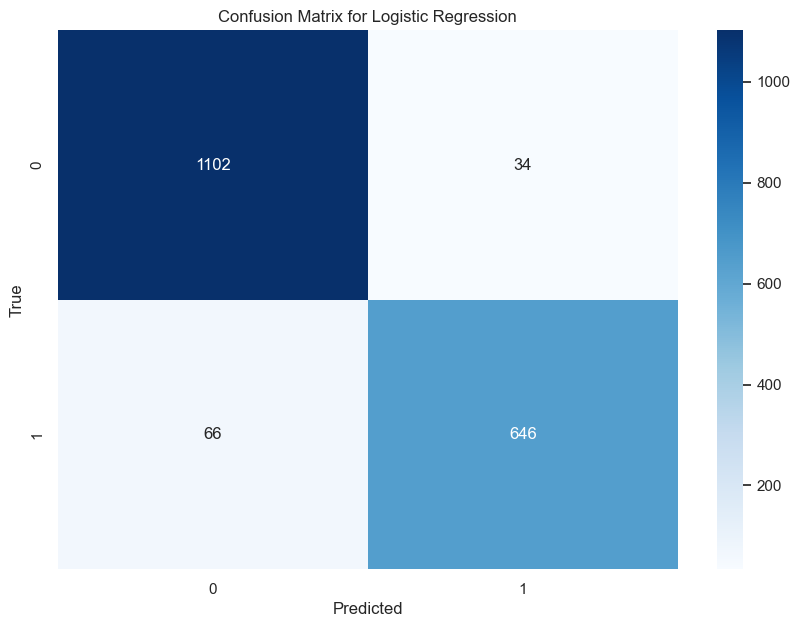

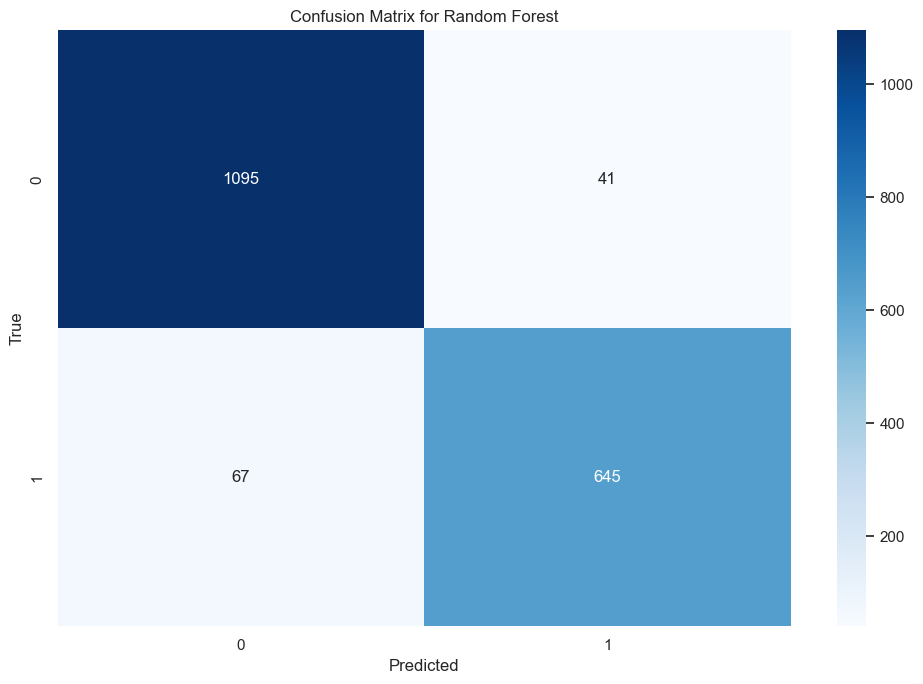

In [80]:
# Calculate confusion matrix for Logistic Regression
lrt_cm = confusion_matrix(y_test, lrt_test_pred)

# Calculate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_test_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(lrt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

As we can see, there is not much difference between both the models, however, the linear regression model is slightly better than the random forest classifier.

## 12. Conclusion

We will now use the linear regression model to predict the probabilities of the positive class for the test dataset.<br>
this will give us an idea on how well our model is performing.

In [81]:
lead_scoring = lrt.predict_proba(X_test_pp)[:,1]
lead_prediction = lrt.predict(X_test_pp)
results = np.round(np.c_[lead_prediction,lead_scoring],2)
#let us take a look at the first ten rows of our predictions
results[:10]

array([[1.  , 0.89],
       [0.  , 0.08],
       [0.  , 0.07],
       [0.  , 0.  ],
       [1.  , 0.78],
       [1.  , 1.  ],
       [1.  , 1.  ],
       [0.  , 0.39],
       [0.  , 0.02],
       [0.  , 0.29]])

As is evident by the results, our model is performing well above the 80% threshold set by the company, in fact it is over 90% accurate, which is a great result.<br>
Throughout our EDA, we identified key features such as phone interactions, email interactions, and profile score, which were the most important features in determining the conversion rate of a lead.<br>
The cherry on top of our data science project is that we have now automated the lead scoring process by implementing a pipeline and a model that can be used to score leads in the future. This will no doubt be an immense help to the sales team, as they will now be able to focus on the most promising leads, resulting in a higher conversion rate and more revenue for the company.<br>
This in Depth analysis of X education company provides the company with actionable insights to work on and improve their lead conversion rate.<br>


# <p style="background-color:#66fecc;font-family:serif;color:#808080;font-size:180%;text-align:center;border-radius:12px 12px;">In Data We Trust</p>